<a href="https://colab.research.google.com/github/Nihalkb/machine_learning/blob/main/sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [ ]:
import chardet
import io

with open('data.csv', 'rb') as f:
  encoding = chardet.detect(f.read())['encoding']
with io.open('data.csv', 'r', encoding=encoding) as f:
  df = pd.read_csv(f)

In [ ]:
df.head()

,Sentiment,News
0,neutral,"According to Gran , the company has no plans t..."
1,neutral,Technopolis plans to develop in stages an area...
2,negative,The international electronic industry company ...
3,positive,With the new production plant the company woul...
4,positive,According to the company 's updated strategy f...


In [ ]:
df.columns

Index(['Sentiment', 'News'], dtype='object')

In [ ]:
df.loc[:, 'Sentiment'].unique()

array(['neutral', 'negative', 'positive'], dtype=object)

In [ ]:
df.loc[:, 'Sentiment'].value_counts()

neutral     2879
positive    1363
negative     604
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='Count'>

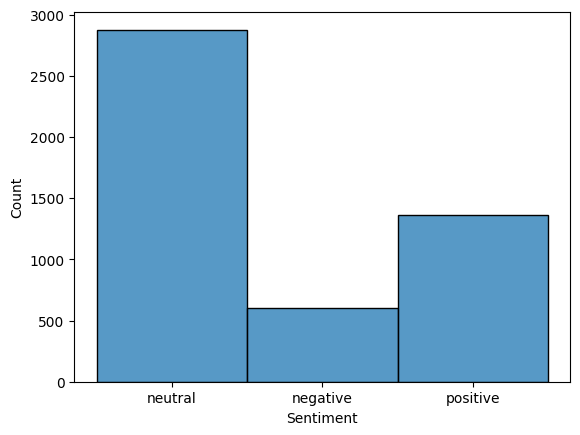

In [ ]:
sns.histplot(df.loc[:, 'Sentiment'])

In [ ]:
negative = df.loc[df.loc[:, 'Sentiment'] == 'negative', :]

In [ ]:
positive = df.loc[df.loc[:, 'Sentiment'] == 'positive', :]

In [ ]:
neutral = df.loc[df.loc[:, 'Sentiment'] == 'neutral', :]

In [ ]:
new_df = pd.concat([negative, positive.iloc[:1000, :], neutral.iloc[:1000, :]], axis = 0)
new_df.shape

(2604, 2)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df.loc[:, 'News'], df.loc[:, 'Sentiment'], test_size = 0.20, random_state = 42)

In [ ]:
vectorizer = TfidfVectorizer(stop_words = 'english')
vectorizer.fit(x_train)

TfidfVectorizer(stop_words='english')

In [ ]:
x_train_vectors = vectorizer.transform(x_train)
x_test_vectors = vectorizer.transform(x_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression(random_state = 42)
logit.fit(x_train_vectors, y_train)

LogisticRegression(random_state=42)

In [ ]:
y_pred = logit.predict(x_test_vectors)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.82      0.42      0.55       110
     neutral       0.73      0.95      0.83       571
    positive       0.79      0.46      0.58       289

    accuracy                           0.75       970
   macro avg       0.78      0.61      0.65       970
weighted avg       0.76      0.75      0.72       970



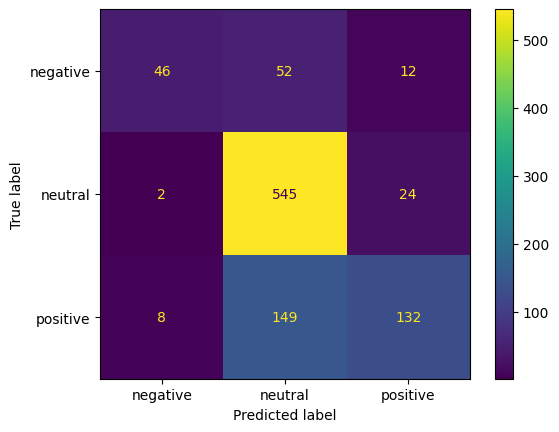

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
classifier = RandomForestClassifier(random_state = 42)

In [ ]:
classifier.fit(x_train_vectors, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = classifier.predict(x_test_vectors)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.41      0.54       110
     neutral       0.75      0.96      0.84       571
    positive       0.79      0.50      0.61       289

    accuracy                           0.76       970
   macro avg       0.78      0.62      0.66       970
weighted avg       0.77      0.76      0.74       970



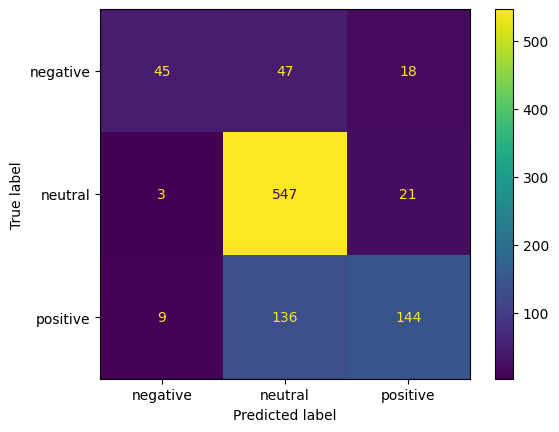

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
import textblob
text = textblob.TextBlob("Profit for the quarter increased by 5%")
str_vec = vectorizer.transform(text)
classifier.predict(str_vec)

array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral'], dtype=object)

In [ ]:
# hyperparameter tuning for rclf:

from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier(random_state = 42)
params = {
    'n_estimators':[100, 200, 300],
    'max_depth' : [5, 10, 15],
    'max_features' : ['auto', 'sqrt', 'log2']
}

In [ ]:
grid_search = GridSearchCV(clf, params, cv = 5)
grid_search.fit(x_train_vectors, y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, 15],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]})

In [ ]:
best_clf = grid_search.best_estimator_

best_clf.fit(x_train_vectors, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=15, max_features='auto', n_estimators=300,
                       random_state=42)

In [ ]:
y_pred = best_clf.predict(x_test_vectors)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.90      0.08      0.15       110
     neutral       0.63      1.00      0.77       571
    positive       0.71      0.14      0.24       289

    accuracy                           0.64       970
   macro avg       0.75      0.41      0.39       970
weighted avg       0.68      0.64      0.54       970



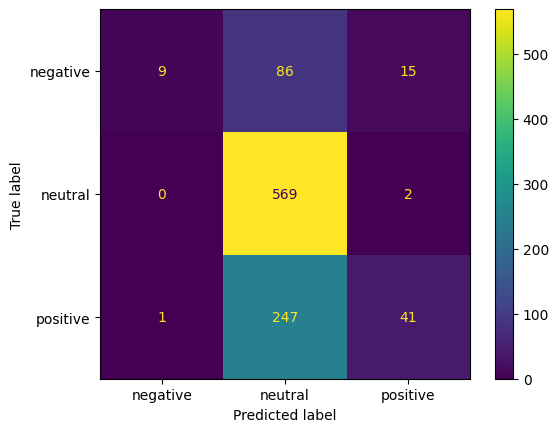

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

In [ ]:
import textblob
text = textblob.TextBlob("Profit for the quarter increased by 5%")
print(text)

Profit for the quarter increased by 5%


In [ ]:
str_vec = vectorizer.transform(text)
sentiment = best_clf.predict(str_vec)

In [ ]:
sentiment

array(['neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral', 'neutral', 'neutral', 'neutral', 'neutral',
       'neutral', 'neutral'], dtype=object)